# Statistics Advance Assignment 5

### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

### Confidence Interval = x̄ ± zα/2 * σ / √n
where:

* CI is the confidence interval
* x̄ is the sample mean
* σ is the population standard deviation
* zα/2 is the z-score for the desired confidence level
* n is the sample size

Assuming n to be 100

Z-score of 95% Confidence interval is 1.96

In [1]:
from math import sqrt
Lower_ci= 50  - ( 1.96* (5/sqrt(100)))
Upper_ci= 50  + ( 1.96* (5/sqrt(100)))

In [2]:
print("I am 95% confident that the population mean lies between "+ str(Lower_ci)+ " and " + str(Upper_ci))

I am 95% confident that the population mean lies between 49.02 and 50.98


### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

Lets consider the following as observed data:

In [3]:
import pandas as pd
df=pd.DataFrame({"Colours":["Blue","Orange","Green","Yellow","Red","Brown"],"Expected_Data(in %)":[20,20,20,10,10,20],"Observed_Data":[45,55,50,30,25,95]})

In [4]:
sum(df['Observed_Data'])

300

In [5]:

df['Expected_Data'] = (df['Expected_Data(in %)']/100 )*300

In [6]:
df

,Colours,Expected_Data(in %),Observed_Data,Expected_Data
0,Blue,20,45,60.0
1,Orange,20,55,60.0
2,Green,20,50,60.0
3,Yellow,10,30,30.0
4,Red,10,25,30.0
5,Brown,20,95,60.0


In [7]:
import scipy.stats as stat
chisquare_test_statistics,p_value=stat.chisquare(df['Observed_Data'],df['Expected_Data'])

In [8]:
chisquare_test_statistics,p_value

(27.083333333333336, 5.4949987771074724e-05)

In [9]:
# find the critical value
significance_value=0.05
dof=len(df['Expected_Data']) -1
crtitcal_value= stat.chi2.ppf(1-significance_value,dof)

In [10]:
if chisquare_test_statistics > crtitcal_value:
     print ("we reject the null hypothesis")
else :
    print ("we fail to reject the null hypothesis")

we reject the null hypothesis


### Conclusion: Expected data matches the Observed Data

### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

In [11]:
data=({"Outcome":["Outcome1","Outcome2","Outcome3"],"Group A":[20,10,15],"Group B":[15,25,20]})

In [12]:
import pandas as pd
df1 = pd.DataFrame(data)
df1 = df1.set_index('Outcome')

In [13]:
df1

,Group A,Group B
Outcome,,
Outcome1,20,15
Outcome2,10,25
Outcome3,15,20


In [14]:
from scipy.stats import chi2_contingency

# Define the contingency table
observed = [[20, 15],
            [10, 25],
            [15, 20]]

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158


### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [15]:
import math

sample_size = 500
sample_proportion = 60 / sample_size
confidence_level = 0.95

### Margin_of_error= zα/2 * σ / √n
### CI = x̄ ± Margin_of_error

### standard_error = sqrt((p * (1 - p)) / n)

In [16]:
import scipy.stats as stat
# Calculate the standard error
standard_error = math.sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

In [17]:
# Calculate the margin of error
margin_of_error = stat.norm.ppf(1 - (1 - confidence_level) / 2) * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sample_proportion - margin_of_error
upper_bound = sample_proportion + margin_of_error

# Print the confidence interval
print("Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

Confidence Interval: [0.0915, 0.1485]


### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [18]:
import scipy.stats as stats

confidence_level = 0.9

# Calculate the Z-score
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Print the Z-score
print("Z-score for a 90% confidence interval:", z_score)


Z-score for a 90% confidence interval: 1.6448536269514722


In [19]:
from math import sqrt

mean=75
standard_deviation=12
confidence_level = 0.90
sample_size=100

margin_of_error = 1.65 * (standard_deviation/ sqrt(sample_size) )

In [20]:
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

In [21]:
print("Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

Confidence Interval: [73.0200, 76.9800]


### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [23]:
df = 10

defines the degrees of freedom (df) for the chi-square distribution. In this case, we set it to 10.

In [24]:
x = np.linspace(0, 30, 500)

generates an array of 500 evenly spaced values ranging from 0 to 30. These values will be used as the x-axis values for plotting the chi-square distribution.

In [25]:
pdf = stats.chi2.pdf(x, df)

This line calculates the probability density function (PDF) of the chi-square distribution using the pdf() function from scipy.stats.chi2. It takes the array of x values (x) and the degrees of freedom (df) as input and returns the corresponding PDF values.

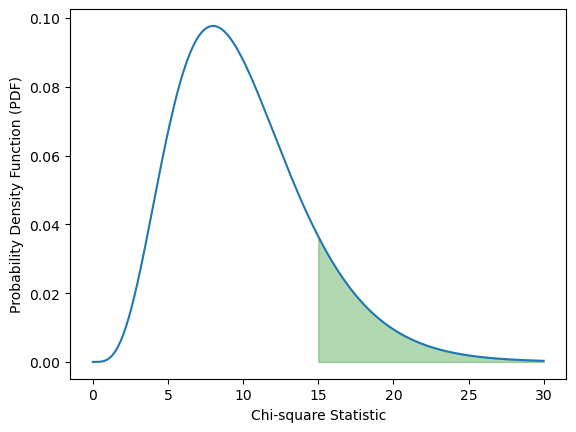

In [26]:
plt.plot(x, pdf)
x_fill = np.linspace(15, 30, 500)
pdf_fill = stats.chi2.pdf(x_fill, df)
plt.fill_between(x_fill, pdf_fill, color='green', alpha=0.3)
plt.xlabel('Chi-square Statistic')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [27]:
sample_size = 1000
sample_proportion = 520/1000
mean=520
#Confidence_Interval is 99%
Sigma = 0.01

In [28]:
from math import sqrt
standard_error = sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

In [29]:
Z_score = stats.norm.ppf(1 - (1 - 0.99) / 2)

In [30]:
margin_of_error = Z_score * standard_error

In [31]:
#Confidence_interval
lower_bound= mean - margin_of_error
upper_bound= mean + margin_of_error
lower_bound,upper_bound

(519.9593051576779, 520.0406948423221)

### Conclusion: 
This means that we are 99% confident that the true proportion of people in the population who prefer Coke falls between approximately 519.9593 and 520.0407.



### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [32]:
sample_size= 100
observed =[45,55]
expected = [50,50]
sigma = 0.05
chisquare_test_statistics,p_value=stat.chisquare(observed,expected)

In [33]:
chisquare_test_statistics,p_value

(1.0, 0.31731050786291115)

In [34]:
# find the critical value
significance_value=0.05
dof=len(expected) -1
crtitcal_value= stat.chi2.ppf(1-significance_value,dof)

In [35]:
if chisquare_test_statistics > crtitcal_value:
     print ("we reject the null hypothesis")
else :
    print ("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.Use a significance level of 0.05.

In [36]:
import pandas as pd

data = {
    "Status": ["Smoker", "Non-smoker"],
    "Lung Cancer Yes": [60, 30],
    "Lung Cancer No": [140, 170]
}

df = pd.DataFrame(data)
df = df.set_index('Status')
df

,Lung Cancer Yes,Lung Cancer No
Status,,
Smoker,60,140
Non-smoker,30,170


In [37]:
from scipy.stats import chi2_contingency

# Define the contingency table
observed = [[60, 140],
            [30, 170]]

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 12.057347670250895
p-value: 0.0005158863863703744


In [39]:
alpha = 0.05

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and lung cancer diagnosis.")


Reject the null hypothesis. There is a significant association between smoking status and lung cancer diagnosis.


### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.Use a significance level of 0.01.
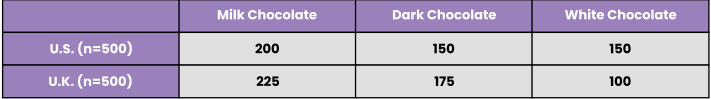

In [43]:
observed=[[200 ,150, 150],
         [225, 175, 100]]

chi2, p_value,dof, expected = chi2_contingency(observed)

print ("Chi-square statistic:" ,chi2)
print("p_value :", p_value)


Chi-square statistic: 13.393665158371041
p_value : 0.0012348168997745918


In [46]:

alpha = 0.01

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis.")
else :
    print ("We Fail to Reject the Null Hypothesis.")

Reject the null hypothesis.


### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [56]:
import scipy.stats as stats

# Sample statistics
sample_mean = 72
sample_std = 10
sample_size = 30

# Null hypothesis: Population mean is 70
null_mean = 70

# Calculate the t-statistic
t_stat = (sample_mean - null_mean) / (sample_std / (sample_size ** 0.5))

# Calculate the p-value
p_value = stats.t.sf(abs(t_stat), sample_size - 1) * 2

# Significance level
alpha = 0.05

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. The population mean is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis.",
          "There is not enough evidence to conclude that the population mean is significantly different from 70.")

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)


Fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is significantly different from 70.
t-statistic: 1.0954451150103321
p-value: 0.28233623728606977


## THE END